# Social Network Analysis @ UNIPI
## Solution of the First Midterm  
### 3/4/2023

*Note:* The total points available for this midterm were 34 (instead of the usual 32) to account for the introduction of a novel exercise (Newman's assortativity) for which no previous solutions were available. 

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Es 1: Graph Modeling (5 points)

Given the matrix $\mathcal{G}$

| &nbsp;  | &nbsp; | &nbsp; | &nbsp;  | &nbsp; |
| --- |---|---| --- |---|
| 0 | 1 | 0      | 1 | 0 |
| 0 | 0 | 1      | 0 | 1 |
| 0 | 1 | 0      | 1 | 0 |
| 1 | 0 | 1      | 0 | 1 |
| 0 | 1 | 1      | 1 | 0 |

- Draw $\mathcal{G}$;
- Synthetically characterize the graph $\mathcal{G}$ describes (directedness, number of nodes/edges, density, components, max/min/avg degrees\dots).


**Notes:** 
- Degree and average degree indicators were considered acceptable also their weighted versions (although a minor error were considered if they were not specified as such).
- A severe error were considered whenever in the density computation the multigraph edge cardinality has been used instead to the plain edge cardinality.

In [75]:
g = nx.DiGraph()

In [76]:
g.add_edge(1, 2)
g.add_edge(1, 4)
g.add_edge(2, 3)
g.add_edge(3, 2)
g.add_edge(3, 4)
g.add_edge(4, 1)
g.add_edge(4, 3)
g.add_edge(4, 5)
g.add_edge(5, 2)
g.add_edge(5, 3)
g.add_edge(5, 4)
g.add_edge(2, 5)


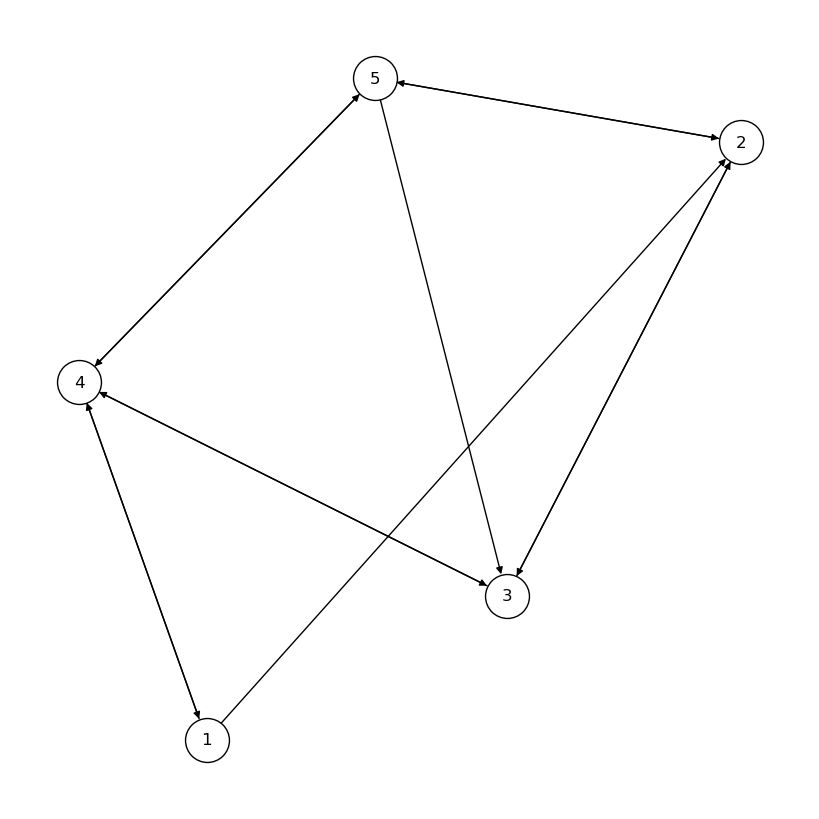

In [77]:
options = {"edgecolors": "black", "node_size": 1000, "node_color": "white"}
nx.draw(g, with_labels=True, **options)
plt.show()

# pos = nx.spring_layout(g, seed=3113794652)
# nx.draw_networkx_nodes(g, pos = pos, node_color="white", **options)
# nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.5, arrows=True)

In [121]:
12/20

0.6

In [78]:
g.is_directed()

True

In [79]:
g.number_of_edges(), g.number_of_nodes()

(12, 5)

In [80]:
nx.density(g) # considering self-loops, 0.4 without considering self-loops

0.6

In [81]:
nx.number_strongly_connected_components(g), nx.number_weakly_connected_components(g)

(1, 1)

In [82]:
comp = nx.strongly_connected_components(g)
for c in comp:
    print(c)
comp2 = nx.weakly_connected_components(g)
for c in comp2:
    print(c)

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}


In [84]:
degs = dict(g.degree())
degs

{1: 3, 2: 5, 4: 6, 3: 5, 5: 5}

In [85]:
max(degs.values()), min(degs.values()), np.mean(list(degs.values()))

(6, 3, 4.8)

In [86]:
in_degs = dict(g.in_degree())

In [87]:
max(in_degs.values()), min(in_degs.values()), np.mean(list(in_degs.values()))

(3, 1, 2.4)

In [88]:
out_degs = dict(g.out_degree())

In [89]:
max(out_degs.values()), min(out_degs.values()), np.mean(list(out_degs.values()))

(3, 2, 2.4)


## Exercise 2: Synthetic Graphs (5 points)

Let $\mathcal{E}$ be an Erdos-Renyi graph having 32064 edges and a connection probability of 0.01:
- How many nodes have $\mathcal{E}$?
- What will be the average degree of $\mathcal{E}$ nodes? and the graph density?
- Describe the regime of $\mathcal{E}$.

In [90]:
e = 32064
p = 0.01

In [91]:
c = 2*e/p
c

6412800.0

In [92]:
n = 1/2 * (1 + math.sqrt(1 + 4*c))
int(n)

2532

In [93]:
p =  (2*e)/(n*(n-1))
p # p is also the density

0.01

In [94]:
avg_deg = (2*e)/n
avg_deg

25.318507359763576

Supercritical regime

$p > \frac{1}{n}$ 

In [95]:
p < 1/n, p == 1/n, p > 1/n, p > np.log(n)/n

(False, False, True, True)

## Exercise 3: Paths (5 points)

Given the $\mathcal{G}$:
- Compute its diameter;
- List all the shortest paths among the pairs [F,E], [H,D], [A,F], [G,D];
- Compute the edge betweenness of (B,E) and (A,C);
- Is it possible to identify an Hamiltonian cycle on $\mathcal{G}$? If not specify the minimum set of edges to needed to build it.

In [96]:
g = nx.Graph()

In [97]:
g.add_edge("A", "B")
g.add_edge("A", "C")
g.add_edge("A", "D")
g.add_edge("A", "E")
g.add_edge("B", "I")
g.add_edge("C", "F")
g.add_edge("C", "G")
g.add_edge("C", "D")
g.add_edge("D", "H")
g.add_edge("E", "I")
g.add_edge("E", "B")
g.add_edge("F", "G")
g.add_edge("F", "H")
g.add_edge("G", "H")

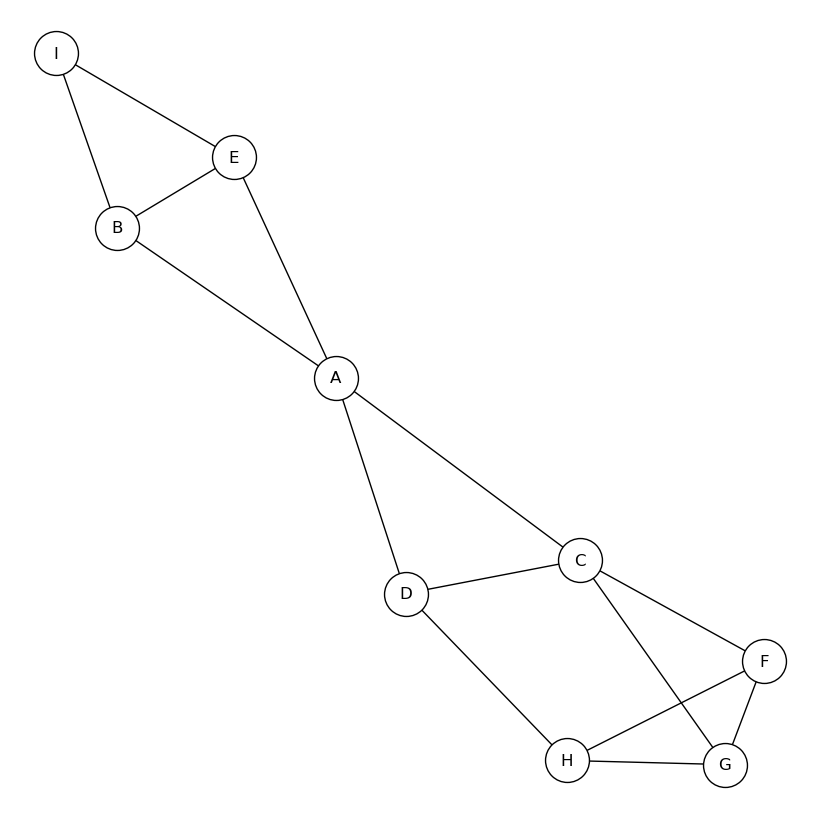

In [98]:
options = {"edgecolors": "black", "node_size": 1000, "node_color": "white"}
nx.draw(g, with_labels=True, **options)
plt.show()


In [99]:
nx.diameter(g)

4

In [100]:
list(nx.all_shortest_paths(g, "F", "E"))

[['F', 'C', 'A', 'E']]

In [101]:
list(nx.all_shortest_paths(g, "H", "D"))

[['H', 'D']]

In [102]:
list(nx.all_shortest_paths(g, "A", "F"))

[['A', 'C', 'F']]

In [103]:
list(nx.all_shortest_paths(g, "G", "D"))

[['G', 'C', 'D'], ['G', 'H', 'D']]

In [104]:
ebc = nx.edge_betweenness_centrality(g, normalized=False)

In [105]:
ebc

{('A', 'B'): 9.0,
 ('A', 'C'): 12.0,
 ('A', 'D'): 8.0,
 ('A', 'E'): 9.0,
 ('B', 'I'): 4.0,
 ('B', 'E'): 1.0,
 ('C', 'F'): 5.833333333333333,
 ('C', 'G'): 5.833333333333333,
 ('C', 'D'): 2.333333333333333,
 ('D', 'H'): 6.333333333333334,
 ('E', 'I'): 4.0,
 ('F', 'G'): 1.0,
 ('F', 'H'): 1.833333333333333,
 ('G', 'H'): 1.833333333333333}

In [106]:
ebc[('B', 'E')], ebc[('A', 'C')]

(1.0, 12.0)

$\mathcal{G}$ does't have an hamiltonian cycle 

## Exercise 4: Indicators (5 points)

Given $\mathcal{G}$ compute:
- Degree Centrality of all nodes;
- Closeness Centrality of A, E;
- Betweenness Centrality of A, E;
- Local Clustering Coefficient of A, E.


In [107]:
{k: g.degree[k] for k in sorted(dict(g.degree()))}

{'A': 4, 'B': 3, 'C': 4, 'D': 3, 'E': 3, 'F': 3, 'G': 3, 'H': 3, 'I': 2}

In [108]:
bt = nx.closeness_centrality(g, 'A')

1/bt, bt # non normalized version

(1.5, 0.6666666666666666)

In [109]:
bt = nx.closeness_centrality(g, 'E')
    
1/bt, bt # non normalized version

(2.0, 0.5)

In [110]:
btc = nx.betweenness_centrality(g, normalized=False)

In [111]:
btc['A'], btc['E']

(15.0, 3.0)

In [112]:
cls = nx.clustering(g)

In [113]:
cls['A'], cls['E']

(0.3333333333333333, 0.6666666666666666)

## Ex 5: Hypergraph Manipulation (6 points)

Given the following incidence matrix I:

- Draw the bipartite graph;
- Draw the left and right projections of the bipartite graph;
- Draw the Hypergraph (nodes on the rows);
- Draw the Dual Hypergraph;
- Draw the s-line graph with s = 2.

| |A|B| C   | D   |
|---|---|---|---|---|
|**1**| 1 | 0 | 0   | 1   |
|**2**| 0 | 1 | 1   | 1   |
|**3**| 1 | 1 | 0   | 1   |
|**4**| 1 | 0 | 0   | 1   |
|**5**| 0 | 0 | 1   | 0   |


In [114]:
import hypernetx as hnx

In [115]:
hed = {
    'A': (1,3,4),
    'B': (2,3),
    'C': (2,5),
    'D': (1,2,3,4)
}

H = hnx.Hypergraph(hed)

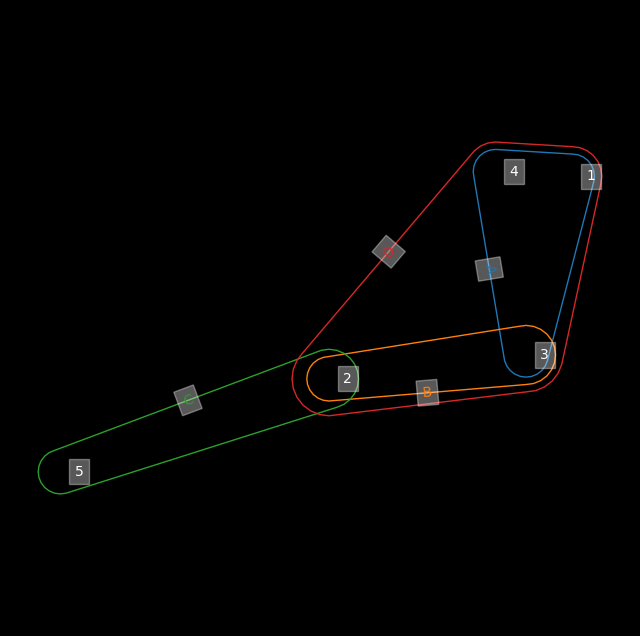

In [116]:
hnx.draw(H)

In [117]:
M_incidence = H.incidence_matrix()
M_incidence.toarray()

array([[0, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1]], dtype=int32)

In [118]:
M_aux1 = H.auxiliary_matrix(s=1)
M_aux1.toarray()

array([[0, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 0]])

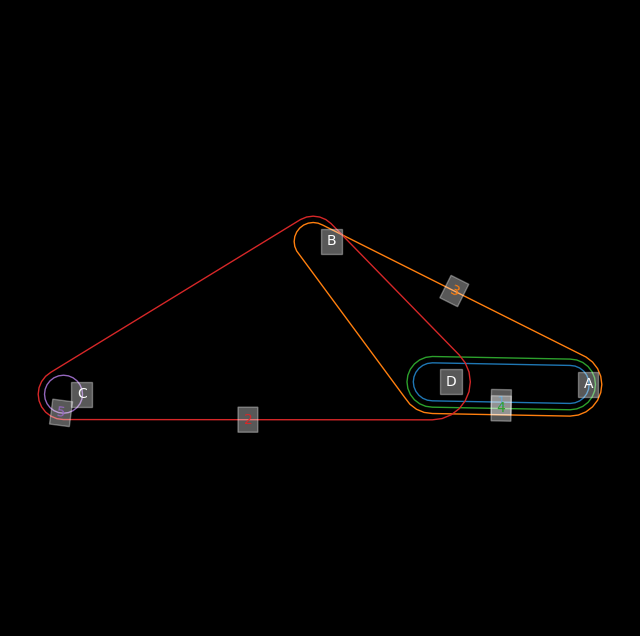

In [119]:
HD = H.dual()
hnx.draw(HD)

In [46]:
bi = H.bipartite()
nx.is_bipartite(bi)

True

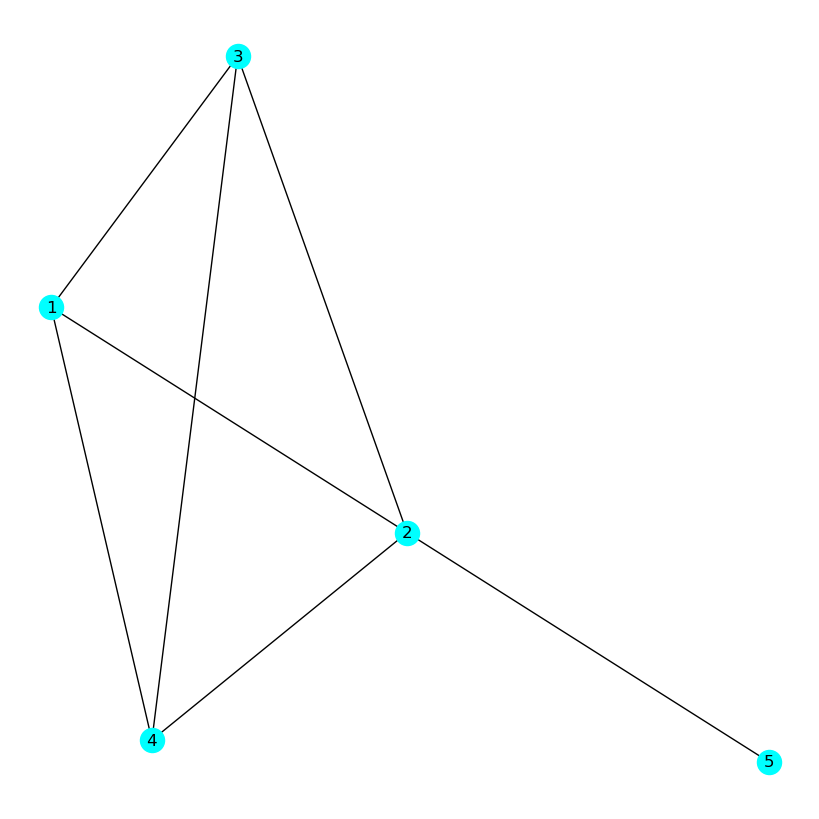

In [47]:
left = nx.projected_graph(bi, [1,2,3,4,5])
nx.draw(left, with_labels = True, node_color='cyan')

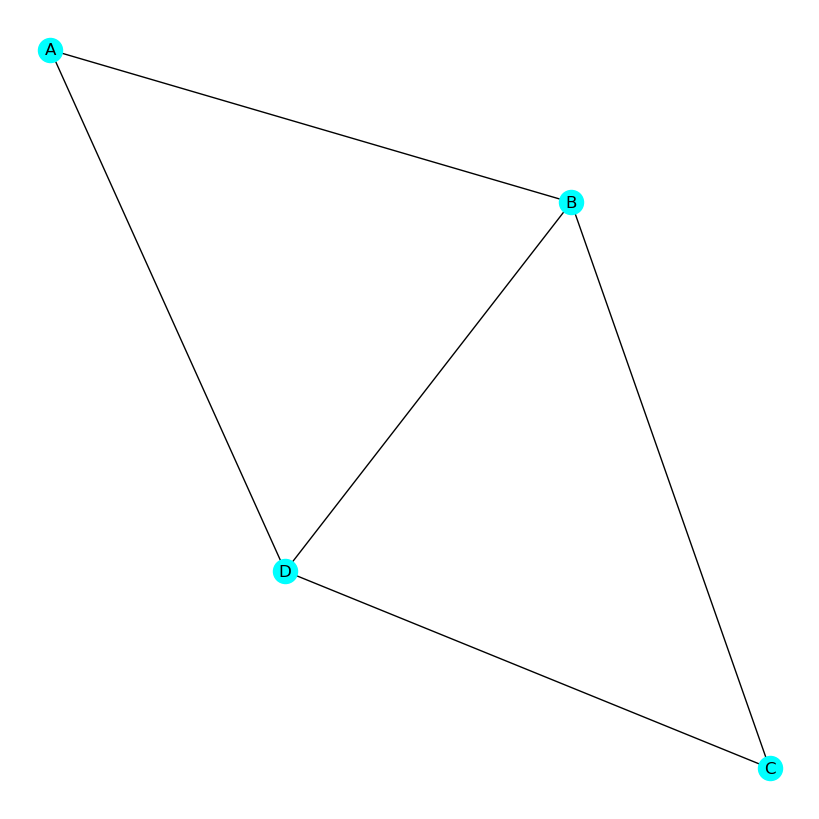

In [48]:
right = nx.projected_graph(bi, ['A','B','C','D'])
nx.draw(right, with_labels = True, node_color='cyan')

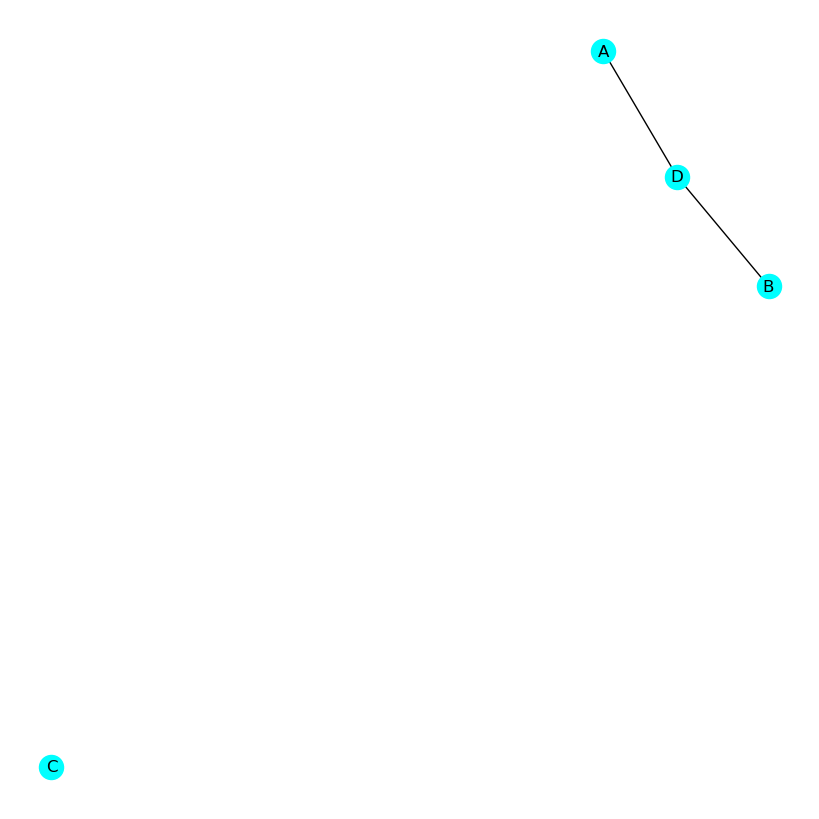

In [49]:
i = 2
A = dict()
g = dict()

A[i],names = H.edge_adjacency_matrix(s=i,index=True)
A[i] = A[i].todense()
g[i] = nx.from_numpy_matrix(A[i])  ## corresponding line graph
nx.relabel.relabel_nodes(g[i],names,copy=False)
nx.draw(g[i], with_labels=True, node_color='cyan');

## Exercise 6: Graph Construction (6 points)

Given **9** nodes and, at most, **20** edges build a DiGraph such that all the following conditions hold:

- The graph is composed by, at least, two strongly connected components;
- The shortest directed path from 2 and 6 is of length 3, the reverse of length 5;
- Node 3 has a clustering coefficient of $\frac{2}{3}$ (considering the undirected version of the graph);
- Node 5 has the highest Out-Degree Centrality;
- Node 6 has the highest In-Degree Centrality;
- Node 2 has the lowest Betweenneess Centrality (considering the undirected version of the graph)

NB: the same highest and lowest values are allowed to be reached by more than one node/edge at a time

In [50]:
g = nx.DiGraph()

In [51]:
g.add_edge(2, "A")
g.add_edge("A", 2)
g.add_edge("B", "A")
g.add_edge("A", "B")
g.add_edge("B", 6)
g.add_edge(6, "C")
g.add_edge("C", "D")
g.add_edge("D", "B")
g.add_edge(3, 6)
g.add_edge(5, 6)
g.add_edge(5, 3)
g.add_edge(3, "E")
g.add_edge("E", 5)

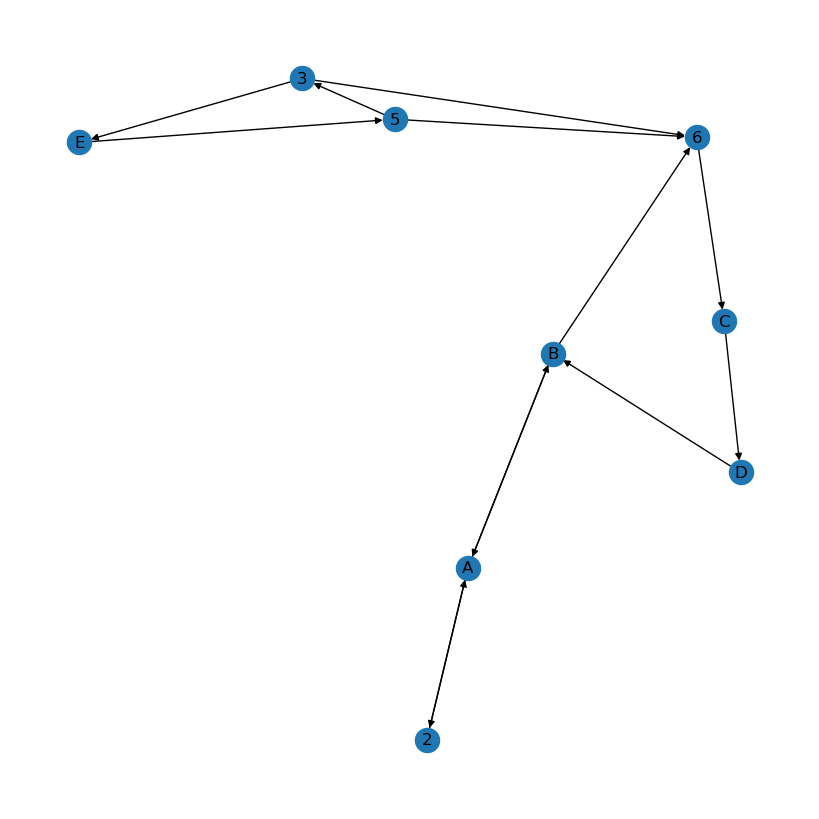

In [52]:
nx.draw(g, with_labels=True)
plt.show()

In [53]:
nx.shortest_path_length(g, 2, 6), nx.shortest_path_length(g, 6, 2)

(3, 5)

In [54]:
s = g.to_undirected()
nx.clustering(s)[3]

0.6666666666666666

In [55]:
bt = nx.betweenness_centrality(s)
bt

{2: 0.0,
 'A': 0.25,
 'B': 0.5,
 6: 0.5892857142857143,
 'C': 0.07142857142857142,
 'D': 0.05357142857142857,
 3: 0.10714285714285714,
 5: 0.10714285714285714,
 'E': 0.0}

In [56]:
sorted(dict(g.in_degree()).items(), key=lambda x: -x[1])

[(6, 3),
 ('A', 2),
 ('B', 2),
 (2, 1),
 ('C', 1),
 ('D', 1),
 (3, 1),
 (5, 1),
 ('E', 1)]

In [57]:
sorted(dict(g.out_degree()).items(), key=lambda x: -x[1])

[('A', 2),
 ('B', 2),
 (3, 2),
 (5, 2),
 (2, 1),
 (6, 1),
 ('C', 1),
 ('D', 1),
 ('E', 1)]